<a href="https://colab.research.google.com/github/NKDevi-maker/newone/blob/main/CM2_Imbalanced_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 102MB/s]


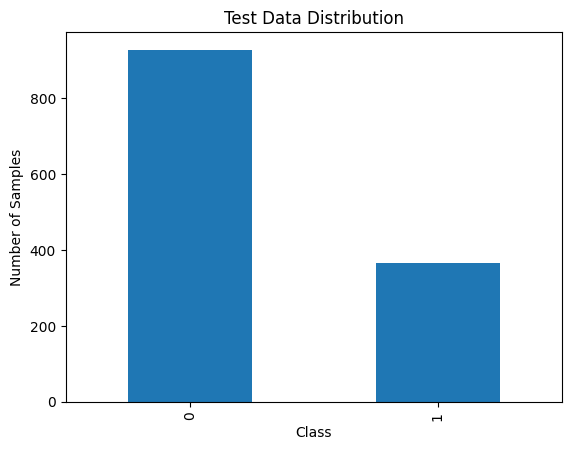

Training Data:(3878, 15),(3878,), Testing Data: (1293, 15),(1293,)


LogisticRegression()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')




X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')

model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
probability = model.predict_proba(X_test)

probability

array([[0.99198461, 0.00801539],
       [0.40842032, 0.59157968],
       [0.33995753, 0.66004247],
       ...,
       [0.97028608, 0.02971392],
       [0.98956492, 0.01043508],
       [0.52509566, 0.47490434]])

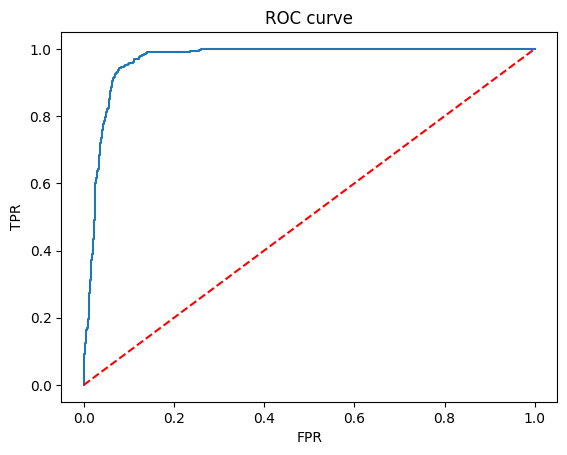

In [ ]:
probabilites = probability[:,1]

fpr, tpr, thr = roc_curve(y_test,probabilites)

plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test,probabilites)


0.9684222957014643

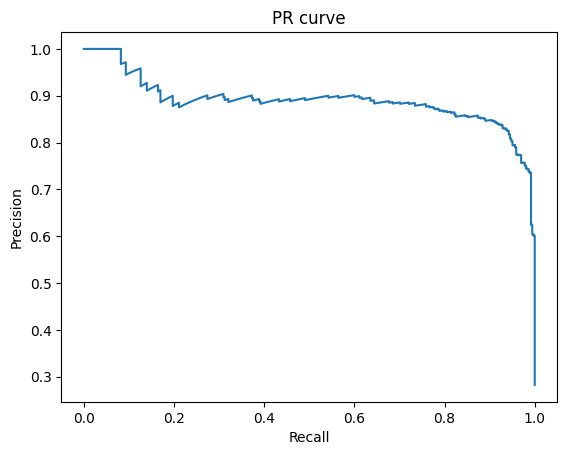

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(y_test, probabilites)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)


0.8895198363094936

### Class Weightage

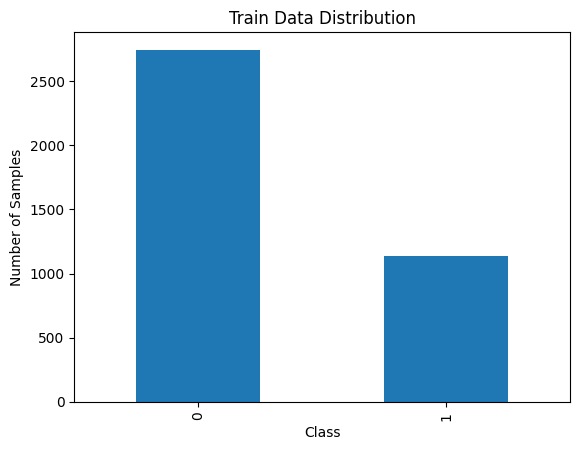

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [ ]:
y_train.value_counts()

0    2744
1    1134
Name: label_num, dtype: int64

In [ ]:
2744/1134

2.419753086419753

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score

In [ ]:
# minority class needs more re-weighting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.41})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8471385542168676, Testing F1 score:0.8341013824884792


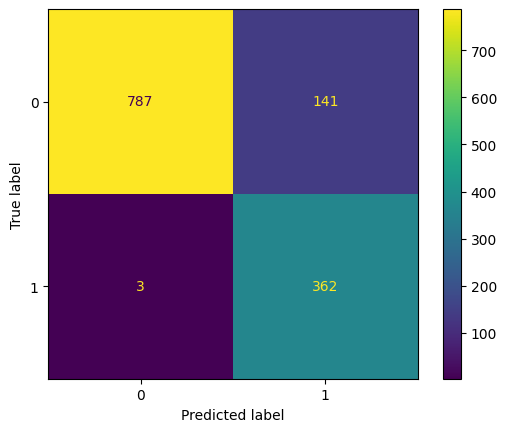

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

### Oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
0    2744
1    1134
Name: label_num, dtype: int64
After Oversampling
1    2744
0    2744
Name: label_num, dtype: int64
Training F1 score:0.930240491216101, Testing F1 score:0.8341013824884792


### SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before SMOTE
0    2744
1    1134
Name: label_num, dtype: int64
After Oversampling
1    2744
0    2744
Name: label_num, dtype: int64
Training F1 score:0.956213437333806, Testing F1 score:0.89
